## Description
The production of a high brillance muon beam is one of the most important challenge for the future of Particle Physics. <br>
A particularly interesting idea consists of shooting high energy positrons on a target, aiming at the production of muons by means of the process: <br><br> $$e^+ + e^- \rightarrow \mu^+ + \mu^-$$ <br>
To mimize the divergence of the resulting "muon beam", the positrons energy is chosen so that the reaction occurs close to threshold (assuming the electrons in the target to be at rest). <br> The main goal of this project is to produce a Monte Carlo simulation of such a process.


### 1-2-3
Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the center of mass energy $\sqrt{s}$ as a parameter. <br> Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$).

Compute and display the angle and momentum components distributions of the emerging muon pairs.

Boost muons four-momenta distributions in the laboratory frame. Display them
***


<img src="img/Scattering.png" width="600">

***
### Relationship 
1. $s=\left (p_1+p_2\right)^2=4E^2$ 
2. $|p|= \sqrt{E^2-m^2_{e}}$
3. $|p'|= \sqrt{E^2-m^2_{\mu}}$



\begin{equation}\label{eq:}
\left ( \frac{d\sigma}{d\Omega}\right)_{CoM}= \frac{\alpha^2}{16E^6}\frac{|\vec{p'}|}{|\vec{p}|}\left(E^4+(\vec{k} \cdot \vec{p})+E^2(m_e^2+m_\mu^2)^2\right)
\end{equation}
<br>
<br>
Replacing the relationships and making the approximation $m_{e}= 0$ in fact $E^2 >> m^2_{e}$
<br>
<br>
<br>
$$
\boxed{\left ( \frac{d\sigma}{d\Omega}\right)_{CoM}= \frac{\alpha^2}{4s} \sqrt{1- \frac{4 m^2_{\mu}}{s} } \left [ \left (1 + \frac{4m_{\mu}^2}{s}\right) + \left (1 - \frac{4m_{\mu}^2}{s}\right)cos^2\theta \right]}
$$
<br>
<br>
***
### ANGLE DISTRIBUTION
$$\left ( \frac{d\sigma}{d\theta}\right)_{CoM}=2 \pi \sin(\theta)\left ( \frac{d\sigma}{d\Omega}\right)_{CoM}$$
<br>
<br>
$$\sigma_{TOT}=\int_{0}^{2\pi}d\phi\int_{0}^{\pi}\sin(\theta) \left (\frac{d\sigma }{d \Omega}\right) d\theta$$
<br>
<br>
The formula valid in the laboratory frame. The steps to change the frame can be checked [here](http://atlas.physics.arizona.edu/~shupe/Indep_Studies_2015/Notes_Goethe_Univ/L4_Scattering_Basic.pdf#page=9).
<br>
<br>
<br>
$$
\left ( \frac{d\sigma}{d\theta}\right)_{LAB}= 4 \cos\left(\frac{\theta}{2}\right)\left ( \frac{d\sigma}{d\theta}\right)_{CoM}
$$
<br>
<br>
We can find the probability density function for the observable $\theta$.
<br>
<br>$$
\Pr( \theta_1 \le \theta \le  \theta_2)= \int_{\theta_1}^{\theta_2}\rho(\theta)\, d\theta $$
<br>
<br>
$$ \boxed{\rho(\theta) = \frac{1}{\sigma_{TOT}} \left(\frac{d\sigma}{d\theta} \right)_{LAB}}$$







In [25]:
import numpy as np
import math as m
import pandas as pd
from scipy import linalg as alg
from matplotlib import pyplot as plt
import matplotlib.ticker as tck
import scipy.integrate as integrate
%precision 4

u'%.4f'

## Costants and function definition 

In [57]:
alpha=0.0072973525664
hbar=6.582119514*10**(-16) # eV*s
c=float(299792458)
s= (0.212*10**(9))**2
E1=np.sqrt(s)/2 
mmu=0.1056583745*10**(9)
p=E1
p1=np.sqrt(E1**2-mmu**2)
def cross_section_differential(theta): 
    return (alpha**2)/(4*s)*np.sqrt(1 - (mmu**2)/E1**2)*(1 + (mmu**2)/E1**2 + (1 - (mmu**2)/E1**2)*np.cos(theta)**2)
def cross_section_differential_lab(theta):
    return 4*np.cos((theta)/2)*cross_section_differential(theta)
def cross_section_theta(theta): 
    return 2*np.pi*np.sin(theta)*cross_section_differential(theta)
def cross_section_theta_lab(theta): 
    return 4*np.cos((theta)/2)*cross_section_theta(theta)
def cross_section_pt(pt):
    return (2*np.pi/np.abs(p1))*cross_section_differential(np.arccos(pt/np.abs(p1))) 
def cross_section_pt_lab(pt):
    return (2*np.pi/np.abs(p1))*cross_section_differential_lab(np.arccos(pt/np.abs(p1))) 
def cross_section_par(par):
    return 1/(p1*np.sqrt(1-((par**2)/(p1**2))))*cross_section_theta(np.arcsin(par/np.abs(p1))) 
def cross_section_par_lab(par):
    return 1/(p1*np.sqrt(1-((par**2)/(p1**2))))*cross_section_theta_lab(np.arcsin(par/np.abs(p1))) 

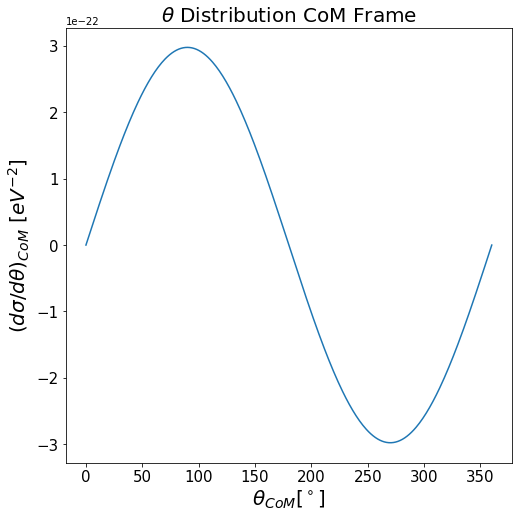

In [27]:
angles=np.linspace(0,360,360)*(np.pi/180)
plt.figure(figsize=[8,8])
plt.ylabel(r"$(d \sigma / d \theta)_{CoM} \,\, [eV^{-2}]$",fontsize=20)
plt.tick_params(labelsize=15)
plt.title(r"$\theta$ Distribution CoM Frame",fontsize=20)
plt.xlabel(r"$ \theta_{CoM} [^\circ]$",fontsize=20)
plt.plot(angles*(180.0/np.pi),cross_section_theta(angles))

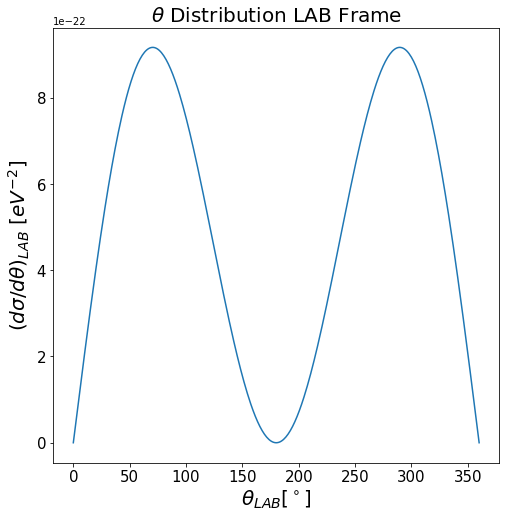

In [28]:
plt.figure(figsize=[8,8])
plt.plot(angles*(180.0/np.pi),cross_section_theta_lab(angles))
plt.tick_params(labelsize=15)
plt.title(r"$\theta$ Distribution LAB Frame",fontsize=20)
plt.xlabel(r"$ \theta_{LAB} [^\circ]$",fontsize=20)
plt.ylabel(r"$(d \sigma / d \theta)_{LAB} \,\, [eV^{-2}]$",fontsize=20)
sigma_tot_lab,_ = integrate.quad(cross_section_theta_lab,0,np.pi)
def pdf_lab_theta(theta): 
    return (1.0/sigma_tot_lab)*cross_section_theta_lab(theta)
cost_norm_lab,_ = integrate.quad(pdf_lab,0,np.pi)
def pdf_lab_norm_theta(theta):
    return (1.0/(sigma_tot_lab*cost_norm_lab))*cross_section_theta_lab(theta)

# # plt.legend(fontsize=15,loc="best")

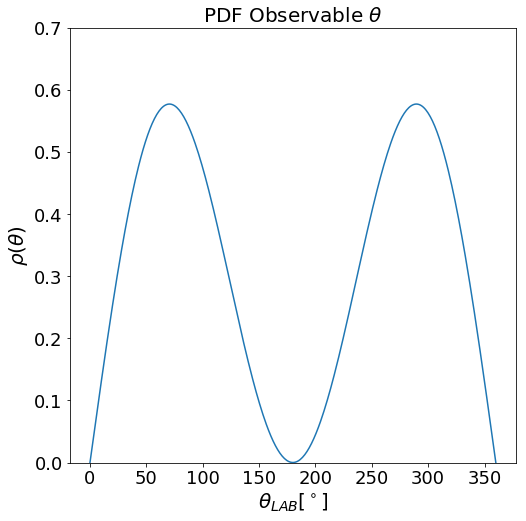

In [29]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_ylim(0,0.7)
plt.title(r"PDF Observable $\theta$",fontsize=20)
plt.xlabel(r"$ \theta_{LAB} [^\circ]$",fontsize=20)
plt.ylabel(r"$ \rho(\theta)$",fontsize=20)
plt.tick_params(labelsize=18)
ax.plot(angles*(180.0/np.pi),pdf_lab_norm_theta(angles))

### MOMENTUM  COMPONENTS DISTRIBUTIONS

\begin{equation*}
P_{T}=p \cdot \hat{z} = |\vec{p}|\cos(\theta) 
\end{equation*}
\begin{equation*}
P_{||}=p \cdot \hat{x} = |\vec{p}|\sin(\theta)
\end{equation*}
\begin{equation*}
d\Omega=sin(\theta)d\theta d\phi
\end{equation*}
\begin{equation*}
\frac{d\sigma}{d p_T} = \frac{d\sigma}{d \theta} \frac{d \theta}{d p_{T}} 
\end{equation*}
\begin{equation*}
\frac{d\sigma}{d p_{||}} = \frac{d\sigma}{d \theta} \frac{d \theta}{d p_{||}} 
\end{equation*}

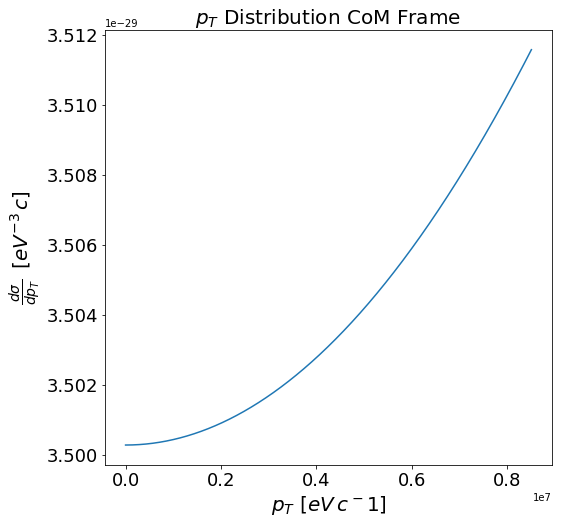

In [63]:
fig, ax = plt.subplots(figsize=[8,8])
momenta=np.linspace(0,p1,10**6)
ax.plot(momenta,cross_section_pt(momenta))
plt.title(r"$p_T$ Distribution CoM Frame ",fontsize=20)
plt.xlabel(r"$ p_T \,\, [eV \, c^-1] $",fontsize=20)
plt.ylabel(r"$ \frac{d\sigma}{d p_T} \,\,\, [eV^{-3} \, c] $",fontsize=20)
plt.tick_params(labelsize=18)

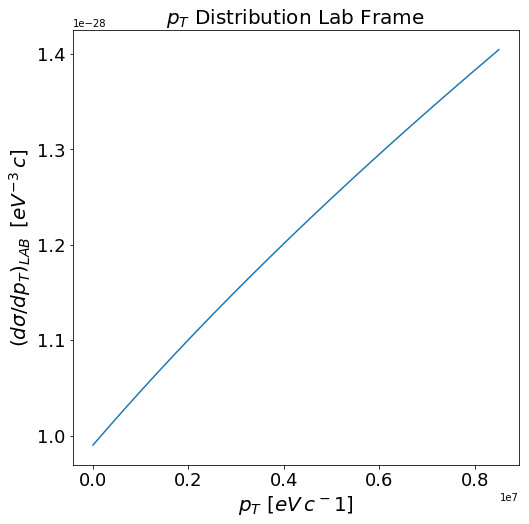

In [62]:
fig, ax = plt.subplots(figsize=[8,8])
ax.plot(momenta,cross_section_pt_lab(momenta))
plt.title(r"$p_T$ Distribution Lab Frame ",fontsize=20)
plt.xlabel(r"$ p_T \,\, [eV \, c^-1] $",fontsize=20)
plt.ylabel(r"$ (d \sigma / d p_T)_{LAB} \,\,\, [eV^{-3} \, c] $",fontsize=20)
plt.tick_params(labelsize=18)

/home/guida/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide


(0, 0.0000)

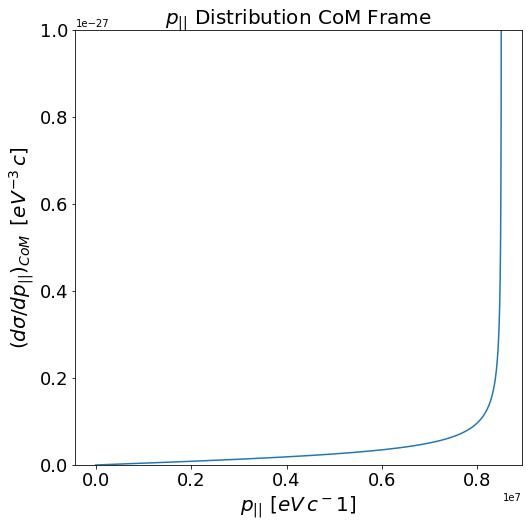

In [69]:
fig, ax = plt.subplots(figsize=[8,8])
ax.plot(momenta,cross_section_par(momenta))
plt.title(r"$p_{||}$ Distribution CoM Frame ",fontsize=20)
plt.xlabel(r"$ p_{||} \,\, [eV \, c^-1] $",fontsize=20)
plt.ylabel(r"$ (d \sigma / d p_{||})_{CoM} \,\,\, [eV^{-3} \, c] $",fontsize=20)
plt.tick_params(labelsize=18)
plt.ylim(0,10**(-27))

/home/guida/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in divide


(0, 0.0000)

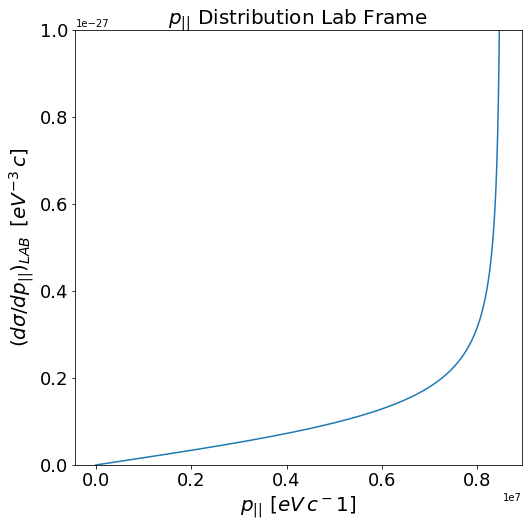

In [68]:
fig, ax = plt.subplots(figsize=[8,8])
ax.plot(momenta,cross_section_par_lab(momenta))
plt.title(r"$p_{||}$ Distribution Lab Frame ",fontsize=20)
plt.xlabel(r"$ p_{||} \,\, [eV \, c^-1] $",fontsize=20)
plt.ylabel(r"$ (d \sigma / d p_{||})_{LAB} \,\,\, [eV^{-3} \, c] $",fontsize=20)
plt.tick_params(labelsize=18)
plt.ylim(0,10**(-27))

4. Write a Monte Carlo simulation that generates scattering events following the distributions that you find analytically.
5. About $N=10^5$ (or more) of such events should be produced and listed as rows in a file with 6 columns representing the muon pair tri-momenta
6. Assume a $6$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations.
7. Repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV.
8. Assume a $2$ meter long, $1.7$ Tesla dipole magnet is placed right after the target. Display the occupancy of the muon hits on a tracking detector placed at 6 meters after the dipole.